In [1]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.OptimizationProblem import OptimizationProblem
from NumOpt.post_processing import plot_histories

PROBLEM PARAMETERS

In [2]:
rho = 1.2           # density air kg/m^3
mu = 1.8e-5         # dyn. viscosity Pa*s
k = 1.2             # form factor
Cl = 0.4            # lift coeff.
e = 0.80            # Oswald efficiency
W0 = 1000           # aircraft weight N
Ws = 8              # wing specific weight N/m^2
etaMax = 0.8        # max prop. efficiency
umean = 20.0        # max eff. velocity m/s
sigma = 5           # std deviation of efficiency

OBJECTIVE FUNCTION CALCULATION

In [3]:
bmin = 5.0
bmax = 35.0
cmin = 0.3
cmax = 1.5

def to_physical(x, xmin, xmax):
    return xmin + (xmax - xmin) * x

def to_scaled(x, xmin, xmax):
    return (x - xmin) / (xmax - xmin)

def required_power(x):
    b_scaled, c_scaled = x

    # Convert from scaled domain [0,1] to physical domain
    b = to_physical(b_scaled, bmin, bmax)
    c = to_physical(c_scaled, cmin, cmax)

    S = b * c
    W = W0 + Ws * S
    L = W
    
    vel = np.sqrt(2*L / (rho * Cl * S))
    q = 0.5 * rho * vel**2
    Re = rho * vel * c / mu
    Cf = 0.074 / (Re**0.2)
    Swet = 2.05 * S

    drag_friction = q * Cf * Swet * k
    drag_induced = L**2 / (q * np.pi * b**2 * e)
    drag = drag_friction + drag_induced

    eta = etaMax * np.exp(-((vel - umean)**2) / (2*sigma**2))
    eta = max(eta, 1e-3)   # safer

    power = drag * vel / eta

    return power


Mu: 0.5
Rescaled Solution (b,c): 25.480206761048997, 0.5034025550491928
Objective value: 923.2823989392093
Number of iterations: 12


Mu: 0.3
Rescaled Solution (b,c): 25.480207104580114, 0.5034025479873071
Objective value: 923.2823989392098
Number of iterations: 12


Mu: 0.1
Rescaled Solution (b,c): 25.480207174780386, 0.5034025445442158
Objective value: 923.2823989392098
Number of iterations: 10


Mu: 0.01
Rescaled Solution (b,c): 25.48020680218447, 0.5034025544343903
Objective value: 923.2823989392095
Number of iterations: 8


Mu: 0.001
Rescaled Solution (b,c): 25.48020250659345, 0.5034026397956269
Objective value: 923.2823989392147
Number of iterations: 7


Mu: 0.0001
Rescaled Solution (b,c): 25.48020698517923, 0.5034025526287514
Objective value: 923.2823989392092
Number of iterations: 8



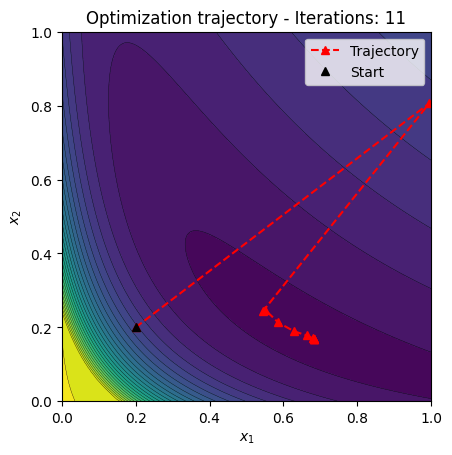

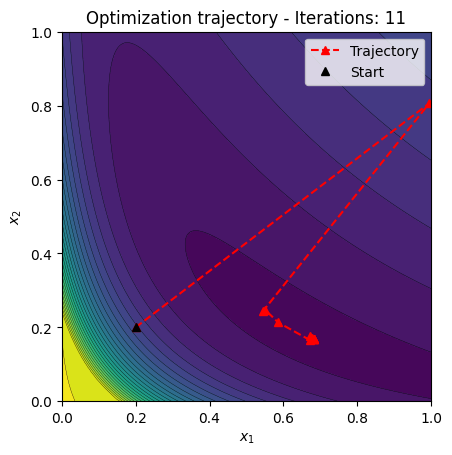

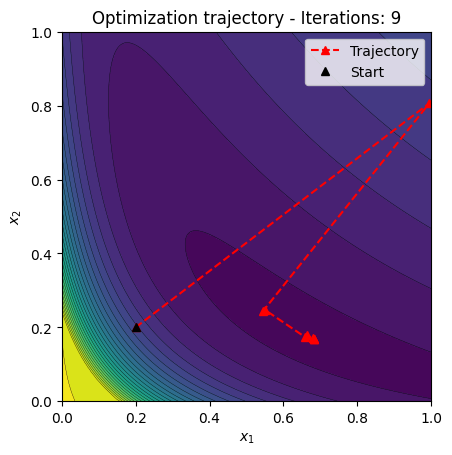

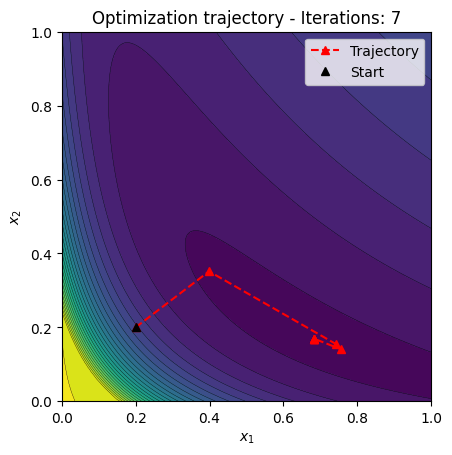

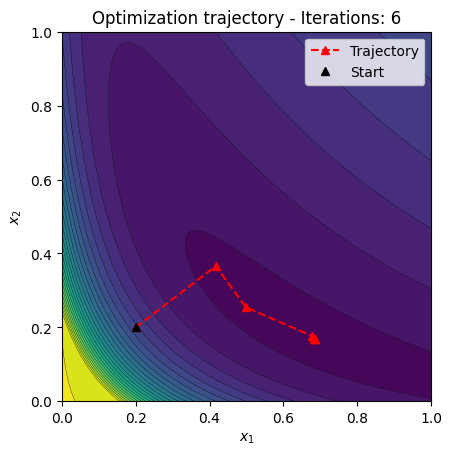

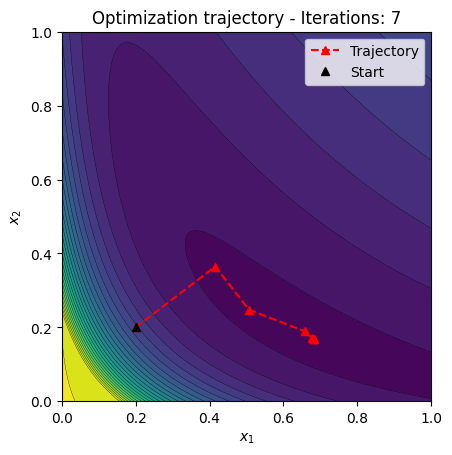

In [4]:
mu1 = 1e-4
mu2 = [0.5, 0.3, 0.1, 0.01, 0.001, 0.0001]
tol = 1e-4
maxiter = 100

histories = []
for i, m in enumerate(mu2):
    prob = OptimizationProblem(nDim=2, bounds=[(0.0, 1.0), (0.0, 1.0)])
    prob.setObjectiveFunction(required_power)
    history = prob.solve(x0=[0.2, 0.2], directionMethod='quasi_newton', 
                         stepMethod='strong_wolfe', options={'maxiter':maxiter, 'tol':tol, 'mu1':mu1, 'mu2':m})
    
    prob.plotSolutionHistory(history, logscale=True)
    
    histories.append(history)
    print("")
    print(f"Mu: {m}")
    print(f"Rescaled Solution (b,c): {to_physical(history['x'][-1][0], bmin, bmax)}, {to_physical(history['x'][-1][1], cmin, cmax)}")
    print(f"Objective value: {history['fval'][-1]}")
    print(f"Number of iterations: {len(history['x'])}")
    print("")
    

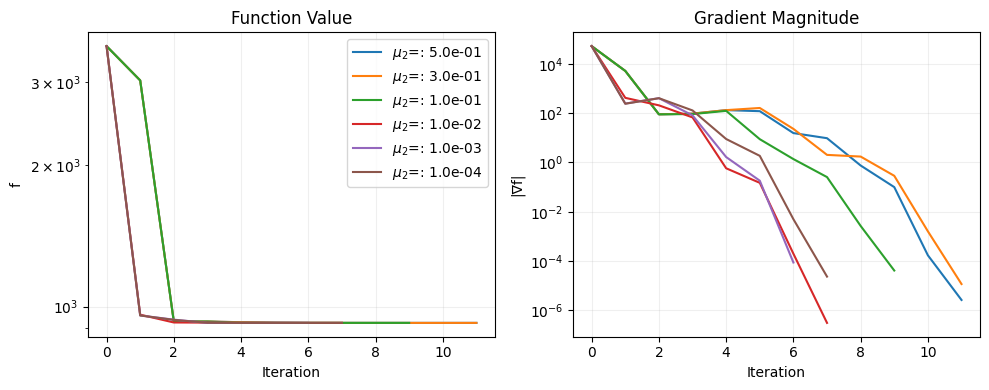

In [5]:
labels = [r'$\mu_2$=: %.1e' % i for i in mu2]  # float with 1 decimal
plot_histories(histories, labels, xlog=(False, False), ylog=(True, True))